In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
mydata = datasets.load_iris()
X = mydata.data[:,2:]
y = mydata.target


In [3]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


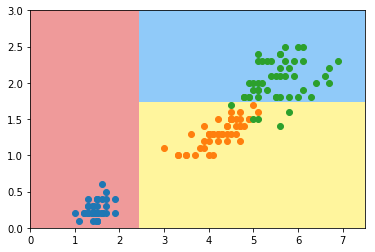

In [5]:
plot_decision_boundary(tree_clf, axis=[0, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

# 模拟信息熵进行划分

In [6]:
from math import log
from collections import Counter
# 此处的p 只表示一个数字
def entropy(y):
    res = 0
    dict_y = Counter(y)
    for num in dict_y.values():
        p = num/len(y)
        res += -p * log(p)
    return res

def split(X, y, d, value):
    index_a = X[:,d] <= value
    index_b = X[:,d] > value
    return X[index_a], X[index_b], y[index_a], y[index_b]

def try_split(X, y):
    best_d, best_value, best_entropy = -1, -1, float('inf')
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                value = (X[sorted_index[i],d] + X[sorted_index[i-1],d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, value)
                y_entropy = entropy(y_l) + entropy(y_r)
                if y_entropy < best_entropy:
                    best_d, best_value, best_entropy = d, value, y_entropy
    return best_d, best_value, best_entropy

                       
                
    
    

In [8]:
best_d, best_value, best_entropy = try_split(X, y)
print('d:', best_d)
print('value:', best_value)
print('entropy:', best_entropy)


d 0
value 2.45
entropy 0.6931471805599453


首先，把蓝色的点和黄色，绿色的点分开了

In [9]:
X_l, X_r, y_l, y_r = split(X, y, best_d, best_value)

In [10]:
entropy(y_l)  

0.0

可以看到，左边的枝 已经完全确定，即只含有某一类信息，不需要再进行划分    
从图中也可以看出，x=2.45左侧的点只有蓝点,不用再进行划分了。

In [11]:
entropy(y_r)  

0.6931471805599453

 可以看到，右边的枝 含有不确定因素，需要再进行划分    
 从图中也可以看出， 在x= 2,45的右侧，包含绿点和黄点两类信息，故需要再进行划分

In [12]:
best_d1, best_value1, best_entropy1 = try_split(X_r, y_r)
print('d1:', best_d1)
print('value1:', best_value1)
print('entropy1:', best_entropy1)

d1: 1
value1: 1.75
entropy1: 0.4132278899361904


y = 1.75 再次把 绿点和黄点分离开了 

In [13]:
X_l1, X_r1, y_l1, y_r1 = split(X_r, y_r, best_d1, best_value1)

In [14]:
entropy(y_l1)

0.30849545083110386

从图中也可以看到，y = 1.75 下边的黄点中，包含有较多的黄点，因此，不确定度较大

In [15]:
entropy(y_r1)

0.10473243910508653

从图中可以看到y = 1.75上边的绿点几乎不包含黄点，不确定性较小。

虽然还存在不确定度，但是不确定性已经较小，并且我们也已经成功的将其分成了三类。

# 未完待续： 用构建二叉树的方式，真正的把决策树构建起来